# K-Means Clustering — Notes

---

## 1. What is Clustering?
- Clustering is an **unsupervised learning technique** used to group data points into clusters such that:  
  - Points in the **same cluster** are **similar** to each other.  
  - Points in **different clusters** are **dissimilar**.  
- No labels are provided during training — the algorithm tries to discover structure in the data automatically.  
- Common applications: customer segmentation, anomaly detection, document clustering, image compression.

---

## 2. Difference from Previous Algorithms (Supervised Learning)
| Aspect | Supervised Learning | Clustering (Unsupervised) |
|--------|------------------|---------------------------|
| Labels | Known (y) | Unknown |
| Goal | Predict output for new inputs | Find natural groupings |
| Examples | Linear Regression, Logistic Regression, Naive Bayes | K-Means, DBSCAN, Agglomerative Clustering |
| Evaluation | Accuracy, Precision, Recall | Silhouette Score, Adjusted Rand Index, Inertia |

---

## 3. K-Means Clustering Algorithm
1. Choose the number of clusters, `k`.  
2. Initialize `k` centroids randomly (or using smart initialization like k-means++).  
3. **Assign** each data point to the **nearest centroid**.  
4. **Update** centroids by calculating the **mean of points** assigned to each cluster.  
5. Repeat steps 3–4 until convergence (centroids do not move significantly or max iterations reached).

---

## 4. Intuition
- Imagine placing `k` “magnets” on a 2D plane.  
- Each data point is **pulled to its nearest magnet**.  
- Magnets move to the **center of their assigned points** repeatedly until positions stabilize.  

---

## 5. Advantages
- Simple to implement and understand.  
- Efficient for **large datasets**.  
- Works well when clusters are **well-separated and spherical**.  
- Easy to **visualize** in 2D or 3D.  

---

## 6. Disadvantages
- Must **choose `k` in advance**.  
- Sensitive to **initialization** (random starting centroids).  
- Assumes clusters are **spherical and equal in size**.  
- Sensitive to **outliers**.  
- Cannot handle **non-linear cluster boundaries**.  

---

## 7. Evaluation Metrics
- **Inertia (Within-Cluster Sum of Squares)**: Lower is better; used in Elbow Method.  
- **Silhouette Score**: Measures how similar a point is to its own cluster vs other clusters.  
- **Adjusted Rand Index (ARI)**: Compares predicted clusters with ground truth (if available).  

---

## 8. Common Use Cases
- Customer segmentation (marketing).  
- Document and text clustering.  
- Image compression and segmentation.  
- Anomaly detection (outlier detection).  
- Grouping genes or proteins in biology datasets.  

---

## 9. Tips for Practicing K-Means
- Always **scale features** (StandardScaler or MinMaxScaler).  
- Try **different values of `k`** and use the Elbow Method or Silhouette Score.  
- Visualize clusters using **2D/3D scatter plots**.  
- Compare clustering output with **true labels** if available, using ARI.  

---

## 10. Summary
- K-Means is a simple, fast, and widely used **clustering algorithm**.  
- It is **unsupervised**, unlike Naive Bayes or Logistic Regression, which are **supervised**.  
- Understanding how to select `k` and preprocess data is key to effective clustering.  

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  ...  color_intensity   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43               15.6  ...             5.64  1.04                          3.92   1065.0
1    13.20        1.78  2.14               11.2  ...             4.38  1.05                          3.40   1050.0
2    13.16        2.36  2.67               18.6  ...             5.68  1.03                          3.17   1185.0
3    14.37        1.95  2.50               16.8  ...             7.80  0.86                          3.45   1480.0
4    13.24        2.59  2.87               21.0  ...             4.32  1.04                          2.93    735.0

[5 rows x 13 columns]


In [4]:
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

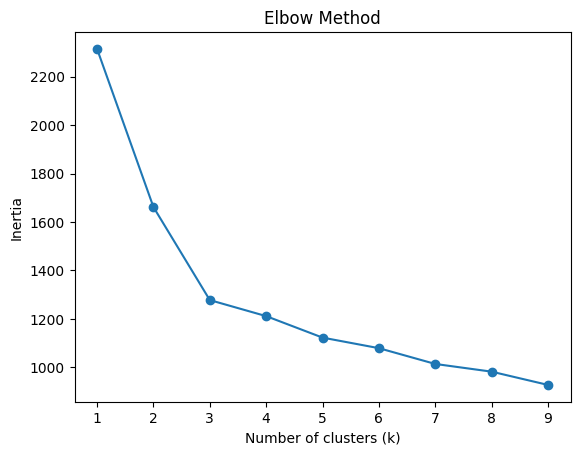

In [6]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled) 

labels = kmeans.labels_

In [23]:
X["Cluster"] = labels 
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  ...   hue  od280/od315_of_diluted_wines  proline  Cluster
0    14.23        1.71  2.43               15.6  ...  1.04                          3.92   1065.0        2
1    13.20        1.78  2.14               11.2  ...  1.05                          3.40   1050.0        2
2    13.16        2.36  2.67               18.6  ...  1.03                          3.17   1185.0        2
3    14.37        1.95  2.50               16.8  ...  0.86                          3.45   1480.0        2
4    13.24        2.59  2.87               21.0  ...  1.04                          2.93    735.0        2

[5 rows x 14 columns]


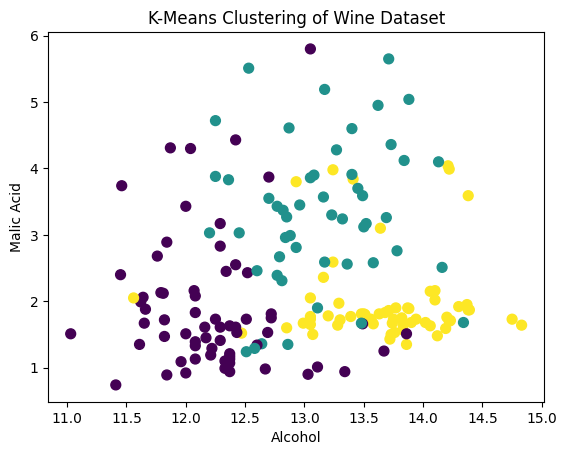

In [24]:
plt.scatter(
    X["alcohol"], 
    X["malic_acid"], 
    c=labels, cmap="viridis", s=50
)
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("K-Means Clustering of Wine Dataset")
plt.show()

In [25]:
from sklearn.metrics import adjusted_rand_score

print("Adjusted Rand Index:", adjusted_rand_score(wine.target, labels))

Adjusted Rand Index: 0.8974949815093207
